# Գինիների որակի կանխատեսում

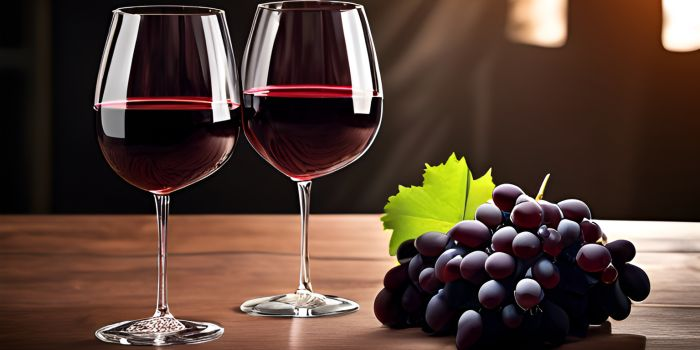

## Ներմուծենք անհրաժեշտ գրադարանները

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Բեռնենք տվյալների բազան

In [ ]:
# Wine Quality Dataset-ի ներբռնում և տվյալների ուսումնասիրում
wine  = pd.read_csv('WineQT.csv')

In [ ]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

#### Տվյալների բնութագրերի թարգմանությունը և դրանց համառոտ բացատրությունները՝

1. Fixed Acidity (Ֆիքսված թթվայնություն) – Գինու մեջ առկա հիմնական թթուները, որոնք կայուն են և չեն գոլորշանում։ Սովորաբար ներառում են տարտարիկ, մալիկ և ցիտրիկ թթուներ։
2. Volatile Acidity (Թվացյալ/Թռչող թթվայնություն) – Գինու մեջ առկա թթուներ, որոնք հեշտությամբ գոլորշանում են՝ հիմնականում քացախաթթու, որը չափից շատ լինելու դեպքում կարող է գինուն անբարենպաստ բույր տալ։
3. Citric Acid (Ցիտրիկ թթու) – Լրացուցիչ թթվայնություն հաղորդող թթու, որն առավել հաճախ օգտագործվում է որպես կայունացուցիչ և համի բարելավիչ։
4. Residual Sugar (Մնացորդային շաքար) – Գինու մեջ մնացած շաքարների քանակը խմորման գործընթացից հետո։ Սովորաբար կիսաքաղցր և քաղցր գինիներն ունեն բարձր մնացորդային շաքար։
5. Chlorides (Քլորիդներ) – Գինու աղիությունը բնորոշող տարր, որը կապված է հանքային նյութերի հետ։
6. Free Sulfur Dioxide (Ազատ ծծմբի երկօքսիդ) – Գինու մեջ պահպանիչ նյութ, որը պաշտպանում է գինին օքսիդացումից և միկրոօրգանիզմներից։
7. Total Sulfur Dioxide (Ընդհանուր ծծմբի երկօքսիդ) – Գինու մեջ առկա ծծմբի երկօքսիդի ընդհանուր քանակը՝ ներառյալ ազատ և կապակցված վիճակները։
8. Density (Խտություն) – Գինու զանգվածը միավոր ծավալում։ Սա օգտագործվում է ալկոհոլի և շաքարի կոնցենտրացիայի հետազոտության համար։
9. pH (թթվայնության ցուցիչ) – Գինու թթվայնության կամ հիմնայնության մակարդակը, որը ցույց է տալիս գինու կայունությունը և համը։
10. Sulphates (Սուլֆատներ) – Գինու մեջ պահպանիչ և համի ուժեղացուցիչ նյութ։
11. Alcohol (Ալկոհոլ) – Գինու մեջ առկա ալկոհոլի տոկոսային պարունակությունը։
12. Quality (Որակ) – Գինու ընդհանուր գնահատականը՝ հիմնված սենսորային փորձարկումների վրա (սովորաբար 0-10 սանդղակով)։
13. Id (Հայտանիշ) – Յուրաքանչյուր նմուշի եզակի նույնականացուցիչ։

## Վերլուծենք տվյալները

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

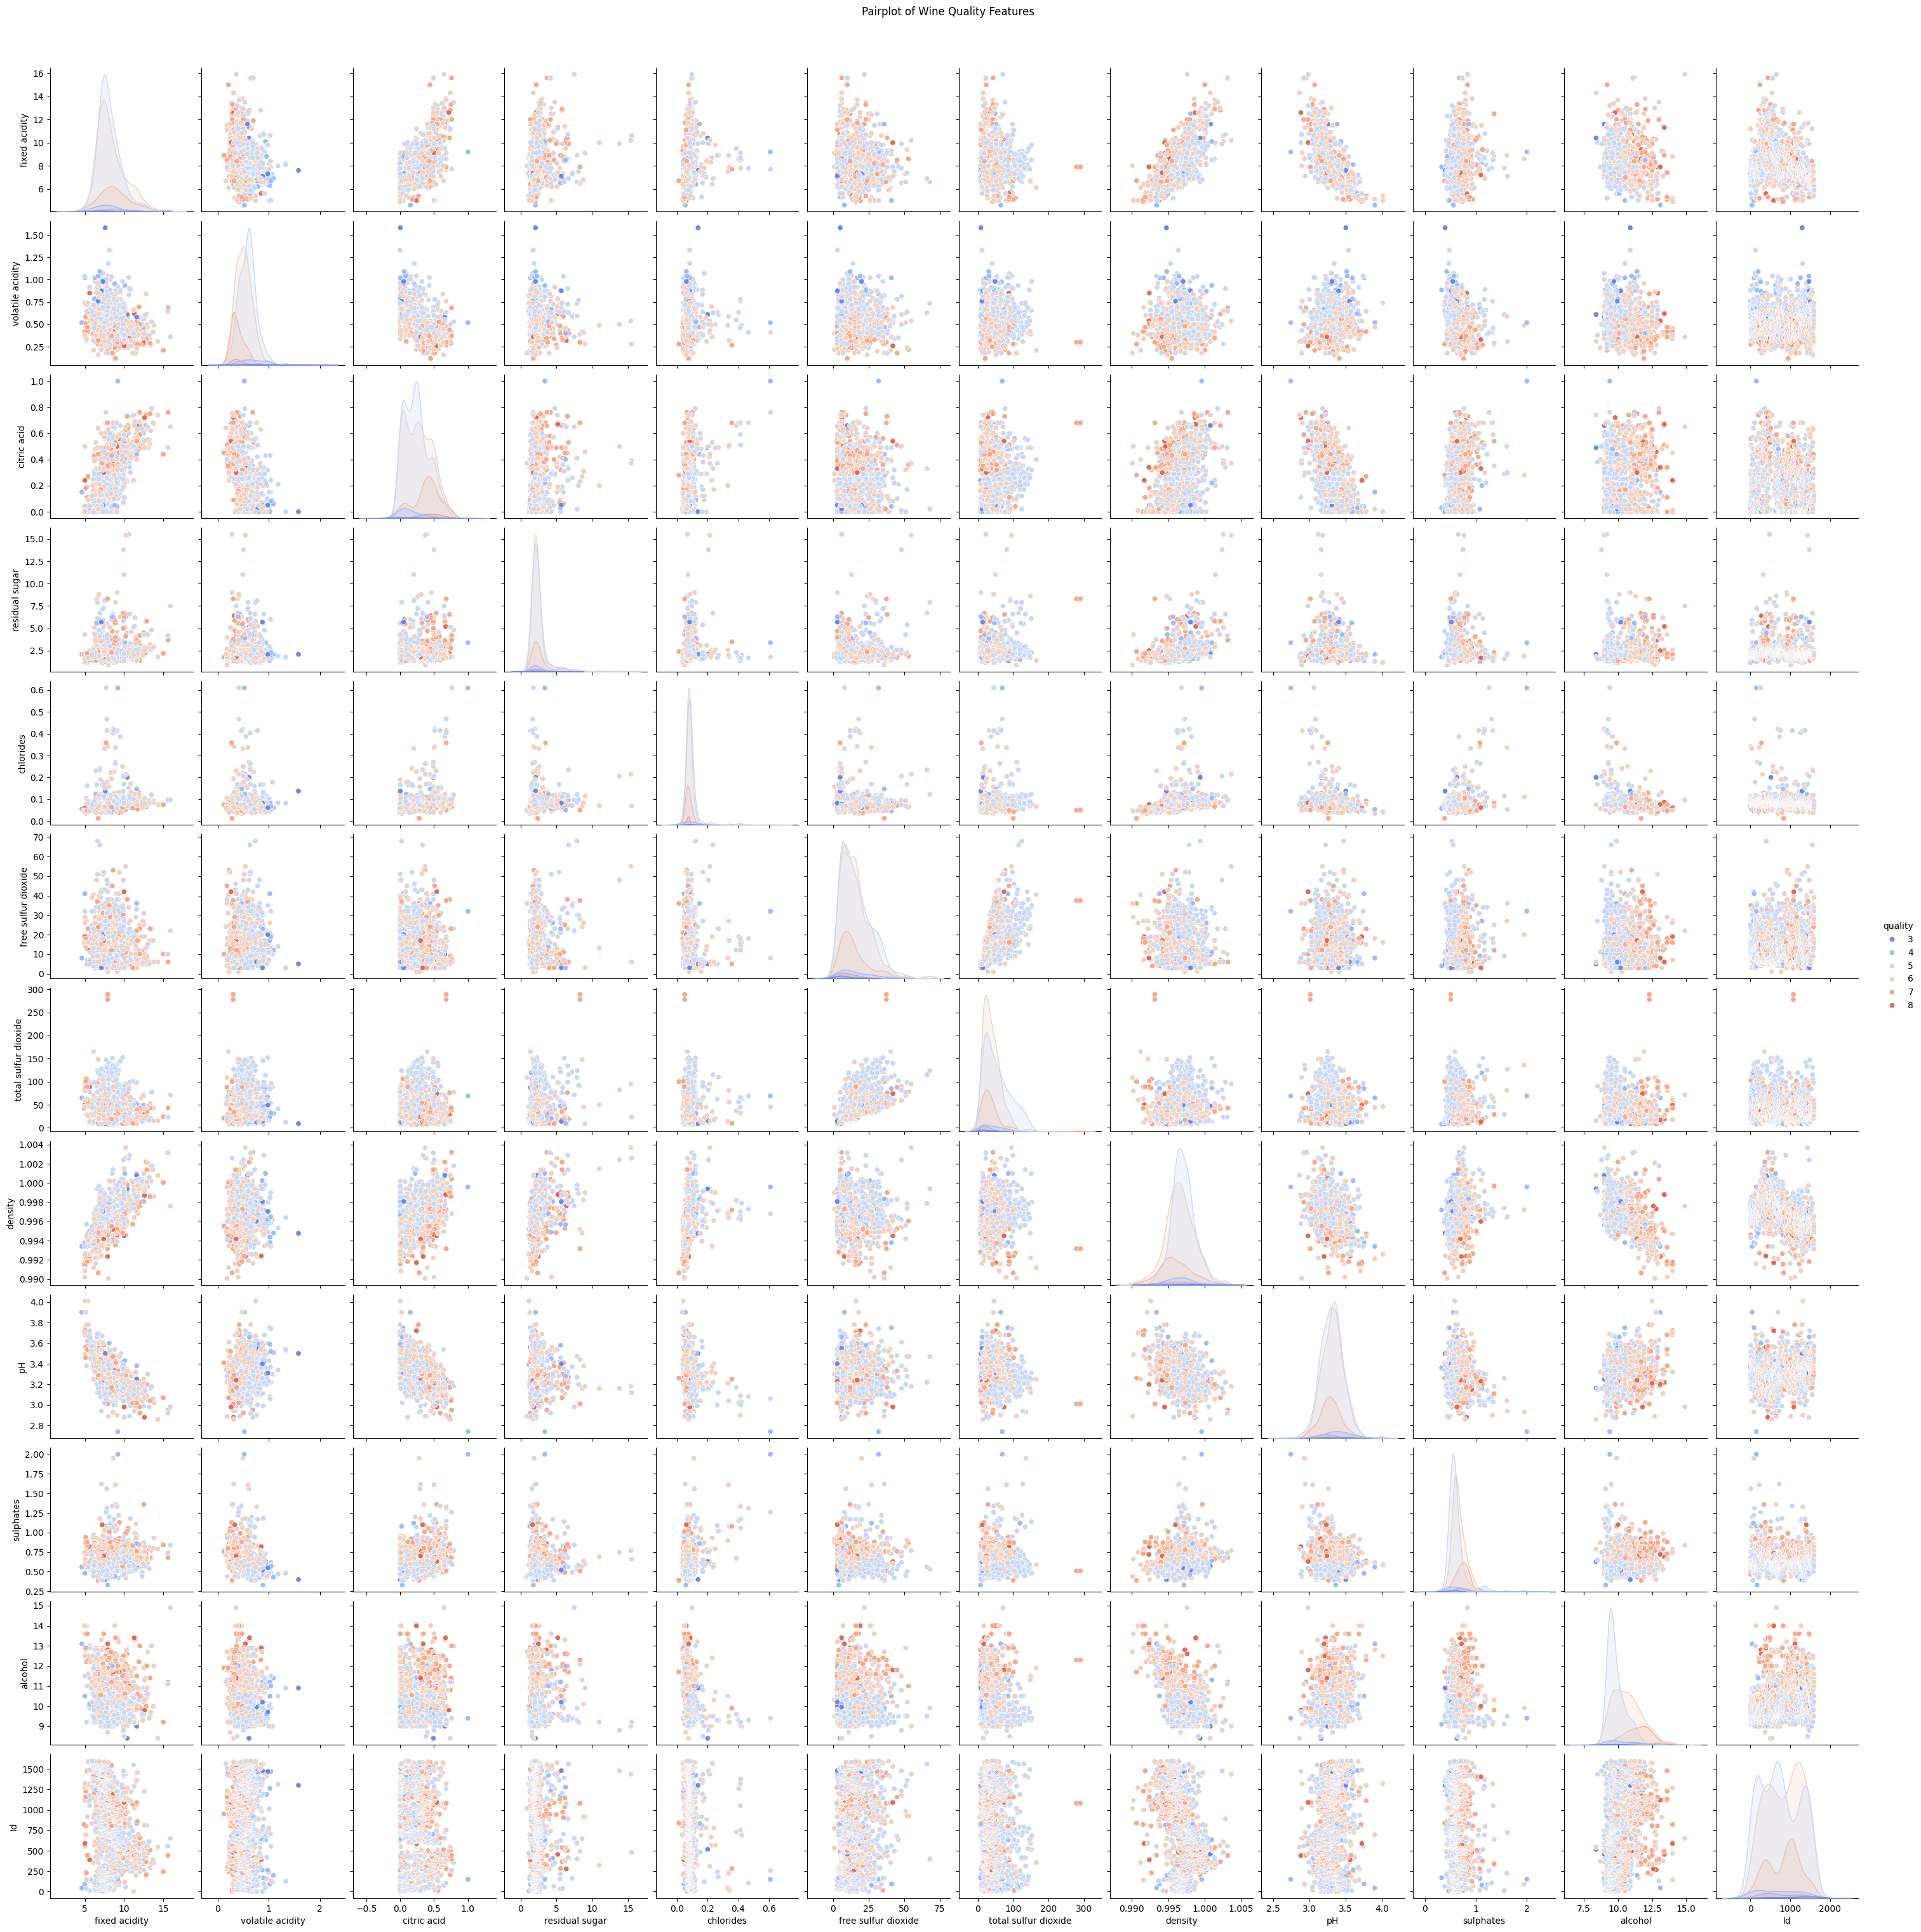

In [ ]:
# Տվյալների կախվածության գրաֆիկական պատկերումը
data = wine.copy()
data['quality'] = data['quality'].astype('category')
sns.pairplot(data, hue='quality', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Wine Quality Features", y=1.02)
plt.show()

In [ ]:
# Դարձնում ենք 0, 1
wine['quality_binary'] = np.where(wine['quality'] < 6, 0, 1)
print(wine[['quality', 'quality_binary']].head())

   quality  quality_binary
0        5               0
1        5               0
2        5               0
3        6               1
4        5               0


In [ ]:
x = wine.drop(columns = ['quality', 'quality_binary'])
y = wine['quality_binary']

In [ ]:
print(y.unique())

[0 1]


### Նորմալիզացում և մասշտաբավորում

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Train-Test բաժանում

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv = ShuffleSplit(n_splits=5, test_size =0.2, random_state=42)
cross_val_score(LogisticRegression(max_iter=5000),x_scaled,y,cv=cv).mean()

0.7344978165938865

## Decision Tree-ի ուսուցում և գնահատում

In [ ]:
def evaluate_classifier(classifier, classifier_name):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {classifier_name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(classifier, x_scaled, y, cv=5)
    print(f"Cross-validated Accuracy: {cv_scores.mean()}")

evaluate_classifier(DecisionTreeClassifier(random_state=42), "Decision Tree Classifier")


--- Decision Tree Classifier ---
Accuracy: 0.7379912663755459
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       102
           1       0.78      0.74      0.76       127

    accuracy                           0.74       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229

Cross-validated Accuracy: 0.6045391863939324


## Logistic Regression-ի ուսուցում և գնահատում

In [ ]:
def evaluate_classifier(classifier, classifier_name):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {classifier_name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(classifier, x_scaled, y, cv=5)
    print(f"Cross-validated Accuracy: {cv_scores.mean()}")

evaluate_classifier(LogisticRegression(max_iter=1000), "Logistic Regression Classifier")


--- Logistic Regression Classifier ---
Accuracy: 0.7685589519650655
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       102
           1       0.79      0.79      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229

Cross-validated Accuracy: 0.7410403738604152


## k-NN-ի ուսուցում և գնահատում

In [ ]:
def evaluate_classifier(classifier, classifier_name):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {classifier_name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(classifier, x_scaled, y, cv=5)
    print(f"Cross-validated Accuracy: {cv_scores.mean()}")

evaluate_classifier(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors Classifier")



--- K-Nearest Neighbors Classifier ---
Accuracy: 0.7161572052401747
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       102
           1       0.72      0.80      0.76       127

    accuracy                           0.72       229
   macro avg       0.71      0.71      0.71       229
weighted avg       0.72      0.72      0.71       229

Cross-validated Accuracy: 0.654416609208611


## Decision Tree Classifier-ի հիպերպարամատրերը


--- Decision Tree Hyperparameter ---
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation accuracy: 0.7264516903861167
Test accuracy: 0.7161572052401747

--- Decision Tree Classifier ---
Accuracy: 0.7161572052401747
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       102
           1       0.75      0.72      0.74       127

    accuracy                           0.72       229
   macro avg       0.71      0.72      0.71       229
weighted avg       0.72      0.72      0.72       229

Confusion Matrix:
[[72 30]
 [35 92]]


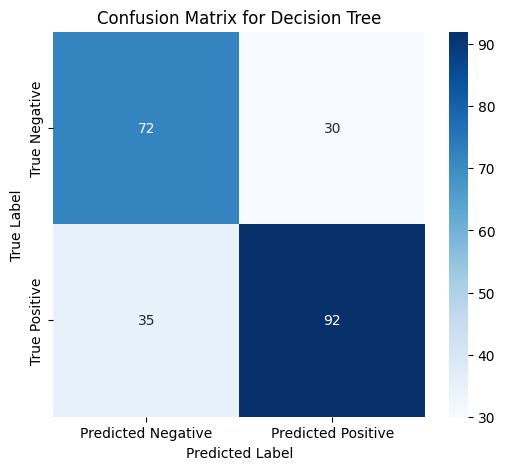

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("\n--- Decision Tree Hyperparameter ---")
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

best_dtree.fit(x_train, y_train)
y_pred = best_dtree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Decision Tree Classifier ---")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Predicted Negative', 'Predicted Positive'],
yticklabels=['True Negative', 'True Positive'])
plt.title(f"Confusion Matrix for Decision Tree")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Logistic Regression-ի հիպերպարամետրերը



--- Logistic Regression Hyperparameter ---
Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7604155407434096
Test accuracy: 0.7379912663755459

--- Logidtic Regresion Classifier ---
Accuracy: 0.7379912663755459
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       102
           1       0.77      0.76      0.76       127

    accuracy                           0.74       229
   macro avg       0.73      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229

Confusion Matrix:
[[73 29]
 [31 96]]


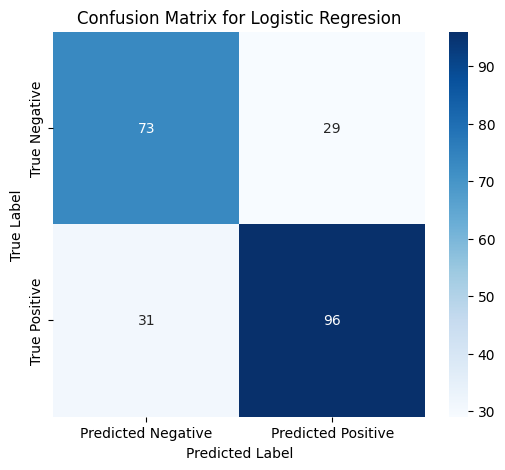

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=5000)
grid_search_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(x_train, y_train)

print("\n--- Logistic Regression Hyperparameter ---")
print("Best hyperparameters:", grid_search_lr.best_params_)
print("Best cross-validation accuracy:", grid_search_lr.best_score_)

best_logreg = grid_search_lr.best_estimator_
y_pred_lr = best_logreg.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Test accuracy:", accuracy_lr)

best_logreg.fit(x_train, y_train)
y_pred = best_logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Logidtic Regresion Classifier ---")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Predicted Negative', 'Predicted Positive'],
yticklabels=['True Negative', 'True Positive'])
plt.title(f"Confusion Matrix for Logistic Regresion")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## K-Neighbors Classifier-ի հիպերպարամետրերը


--- K-Nearest Neighbors Hyperparameter ---
Best hyperparameters: {'metric': 'cosine', 'n_neighbors': 26, 'weights': 'distance'}
Best cross-validation accuracy: 0.7702035669248785
Test accuracy: 0.7816593886462883

--- K-Neighbors Classifier ---
Accuracy: 0.7816593886462883
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.80      0.80      0.80       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

Confusion Matrix:
[[ 77  25]
 [ 25 102]]


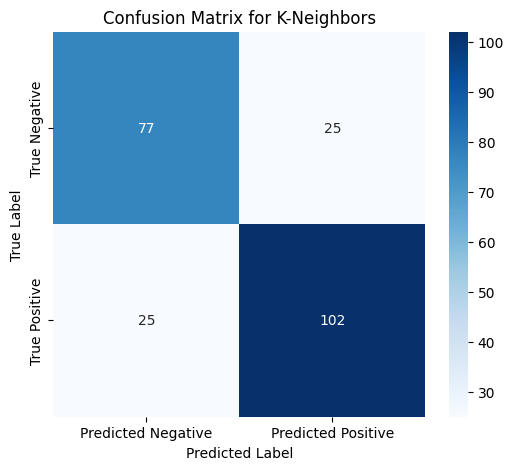

In [ ]:
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

print("\n--- K-Nearest Neighbors Hyperparameter ---")
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Best cross-validation accuracy:", grid_search_knn.best_score_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Test accuracy:", accuracy_knn)

best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- K-Neighbors Classifier ---")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Predicted Negative', 'Predicted Positive'],
yticklabels=['True Negative', 'True Positive'])
plt.title(f"Confusion Matrix for K-Neighbors")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Մեր ուսումնասիրած մոդելների համեմատում և դիագրամի ստեղծում


In [ ]:
def print_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy}")

print_results("Decision Tree", y_test, best_dtree.predict(x_test))
print_results("Logistic Regression", y_test, best_logreg.predict(x_test))
print_results("KNN", y_test, best_knn.predict(x_test))


--- Decision Tree ---
Accuracy: 0.7161572052401747

--- Logistic Regression ---
Accuracy: 0.7379912663755459

--- KNN ---
Accuracy: 0.7816593886462883


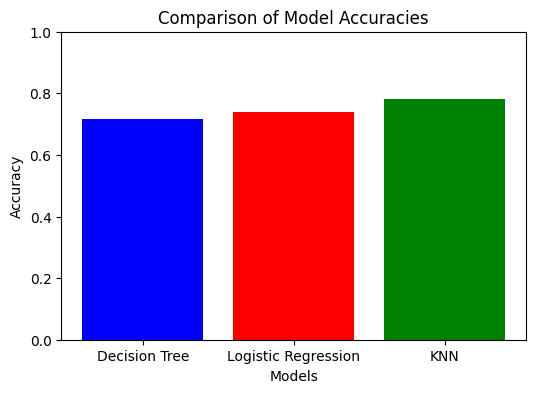

In [ ]:
res = {
    "Decision Tree": accuracy_score(y_test, best_dtree.predict(x_test)),
    "Logistic Regression": accuracy_score(y_test, best_logreg.predict(x_test)),
    "KNN": accuracy_score(y_test, best_knn.predict(x_test)),
}

plt.figure(figsize=(6, 4))
plt.bar(res.keys(), res.values(), color = ['blue', 'red', 'green'])
plt.title("Comparison of Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

## Լավագույն մոդելի ընտրություն

In [ ]:
models = {
    "Decision Tree": best_dtree,
    "Logistic Regression": best_logreg,
    "KNN": best_knn,
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"\nThe best model is {best_model} with an accuracy of {best_accuracy}")

Decision Tree Accuracy: 0.7161572052401747
Logistic Regression Accuracy: 0.7379912663755459
KNN Accuracy: 0.7816593886462883

The best model is KNN with an accuracy of 0.7816593886462883


## Նոր մոդել

In [ ]:
# SVC-ի ուսուցում և գնահատում
def evaluate_classifier(classifier, classifier_name):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {classifier_name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(classifier, x_scaled, y, cv=5)
    print(f"Cross-validated Accuracy: {cv_scores.mean()}")

evaluate_classifier(SVC(), "Support Vector Classifier")


--- Support Vector Classifier ---
Accuracy: 0.7685589519650655
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       102
           1       0.79      0.80      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229

Cross-validated Accuracy: 0.7217497893204626



--- Support Vector Classifier Hyperparameter ---
Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.752699213354951
Test accuracy: 0.7685589519650655

--- SVC Classifier ---
Accuracy: 0.7685589519650655
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       102
           1       0.79      0.80      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229

Confusion Matrix:
[[ 75  27]
 [ 26 101]]


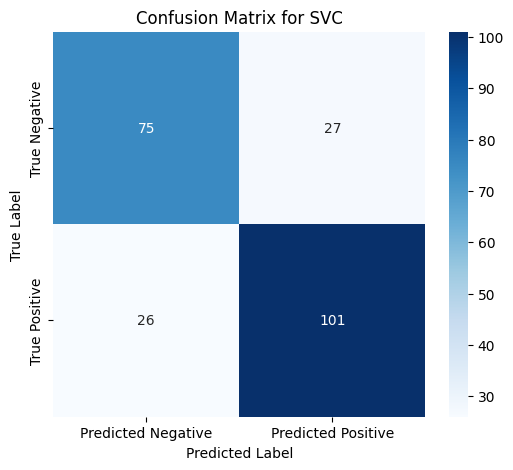

In [ ]:
# SVC-ի հիպերպարամետրերը
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svc = SVC()
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(x_train, y_train)

print("\n--- Support Vector Classifier Hyperparameter ---")
print("Best hyperparameters:", grid_search_svc.best_params_)
print("Best cross-validation accuracy:", grid_search_svc.best_score_)

best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Test accuracy:", accuracy_svc)

best_svc.fit(x_train, y_train)
y_pred = best_svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- SVC Classifier ---")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Predicted Negative', 'Predicted Positive'],
yticklabels=['True Negative', 'True Positive'])
plt.title(f"Confusion Matrix for SVC")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Մեր ուսումնասիրած մոդելների համեմատումը նոր մոդելի հետ և դիագրամի ստեղծում
def print_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy}")

print_results("Decision Tree", y_test, best_dtree.predict(x_test))
print_results("Logistic Regression", y_test, best_logreg.predict(x_test))
print_results("KNN", y_test, best_knn.predict(x_test))
print_results("SVC", y_test, best_svc.predict(x_test))


--- Decision Tree ---
Accuracy: 0.7161572052401747

--- Logistic Regression ---
Accuracy: 0.7379912663755459

--- KNN ---
Accuracy: 0.7816593886462883

--- SVC ---
Accuracy: 0.7685589519650655


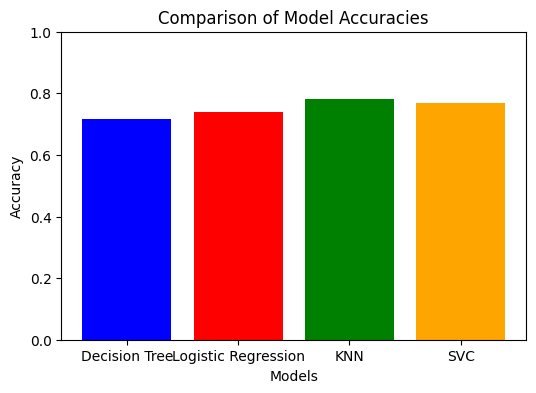

In [ ]:
res = {
    "Decision Tree": accuracy_score(y_test, best_dtree.predict(x_test)),
    "Logistic Regression": accuracy_score(y_test, best_logreg.predict(x_test)),
    "KNN": accuracy_score(y_test, best_knn.predict(x_test)),
    "SVC": accuracy_score(y_test, best_svc.predict(x_test)),
}

plt.figure(figsize=(6, 4))
plt.bar(res.keys(), res.values(), color = ['blue', 'red', 'green', 'orange'])
plt.title("Comparison of Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Լավագույն մոդելի ընտրություն
models = {
    "Decision Tree": best_dtree,
    "Logistic Regression": best_logreg,
    "KNN": best_knn,
    "SVC": best_svc,
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"\nThe best model is {best_model} with an accuracy of {best_accuracy}")

Decision Tree Accuracy: 0.7161572052401747
Logistic Regression Accuracy: 0.7379912663755459
KNN Accuracy: 0.7816593886462883
SVC Accuracy: 0.7685589519650655

The best model is KNN with an accuracy of 0.7816593886462883
